In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('twitch_tv.csv')

In [3]:
data.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,64:ff9b::36e6:a86c,2001:2d8:e66a:6a64:88dd:1e73:cab2:5129,TLSv1.2,469,Application Data
1,2,0.000023,2001:2d8:e66a:6a64:88dd:1e73:cab2:5129,64:ff9b::36e6:a86c,TCP,72,49666 > 443 [ACK] Seq=1 Ack=398 Win=2041 Len...
2,3,0.000035,64:ff9b::36e6:a86c,2001:2d8:e66a:6a64:88dd:1e73:cab2:5129,TLSv1.2,103,Application Data
3,4,0.000230,64:ff9b::36e6:a86c,2001:2d8:e66a:6a64:88dd:1e73:cab2:5129,TCP,103,"[TCP Retransmission] 443 > 49666 [PSH, ACK] ..."
4,5,0.000273,64:ff9b::924b:32a7,2001:2d8:e66a:6a64:88dd:1e73:cab2:5129,TLSv1.2,426,"Application Data, Application Data"


In [4]:
data.isnull().sum()

No.            0
Time           0
Source         0
Destination    0
Protocol       0
Length         0
Info           0
dtype: int64

In [5]:
data1 = data.copy()
data1.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,64:ff9b::36e6:a86c,2001:2d8:e66a:6a64:88dd:1e73:cab2:5129,TLSv1.2,469,Application Data
1,2,0.000023,2001:2d8:e66a:6a64:88dd:1e73:cab2:5129,64:ff9b::36e6:a86c,TCP,72,49666 > 443 [ACK] Seq=1 Ack=398 Win=2041 Len...
2,3,0.000035,64:ff9b::36e6:a86c,2001:2d8:e66a:6a64:88dd:1e73:cab2:5129,TLSv1.2,103,Application Data
3,4,0.000230,64:ff9b::36e6:a86c,2001:2d8:e66a:6a64:88dd:1e73:cab2:5129,TCP,103,"[TCP Retransmission] 443 > 49666 [PSH, ACK] ..."
4,5,0.000273,64:ff9b::924b:32a7,2001:2d8:e66a:6a64:88dd:1e73:cab2:5129,TLSv1.2,426,"Application Data, Application Data"


In [6]:
data1 = data1.drop(['No.', 'Protocol', 'Info'], axis = 1)
data1.head()

,Time,Source,Destination,Length
0,0.000000,64:ff9b::36e6:a86c,2001:2d8:e66a:6a64:88dd:1e73:cab2:5129,469
1,0.000023,2001:2d8:e66a:6a64:88dd:1e73:cab2:5129,64:ff9b::36e6:a86c,72
2,0.000035,64:ff9b::36e6:a86c,2001:2d8:e66a:6a64:88dd:1e73:cab2:5129,103
3,0.000230,64:ff9b::36e6:a86c,2001:2d8:e66a:6a64:88dd:1e73:cab2:5129,103
4,0.000273,64:ff9b::924b:32a7,2001:2d8:e66a:6a64:88dd:1e73:cab2:5129,426


In [7]:
p = data1.Source.str.startswith('64')
data1.loc[p, 'Source'] = 'phone'
p = data1.Destination.str.startswith('64')
data1.loc[p, 'Destination'] = 'phone'

In [8]:
b = data1.Source.str.contains(':')
data1.loc[b, 'Source'] = 'base'
b = data1.Destination.str.contains(':')
data1.loc[b, 'Destination'] = 'base'

In [9]:
data1.Source.unique(), data1.Destination.unique()

(array(['phone', 'base'], dtype=object),
 array(['base', 'phone'], dtype=object))

In [10]:
data1['Link'] = data1.apply(lambda a: "UL" if a.Source == 'phone' else "DL", axis = 1)

In [11]:
data1

,Time,Source,Destination,Length,Link
0,0.000000,phone,base,469,UL
1,0.000023,base,phone,72,DL
2,0.000035,phone,base,103,UL
3,0.000230,phone,base,103,UL
4,0.000273,phone,base,426,UL
...,...,...,...,...,...
1344143,3713.382223,base,phone,72,DL
1344144,3713.382235,base,phone,72,DL
1344145,3713.382246,base,phone,72,DL
1344146,3714.764660,phone,base,472,UL


In [12]:
ul = []
dl = []
columns = ['time', 'traffic']

for i in data1.values:
    if i[4] == "UL":
        ul.append([i[0], int(i[3])])
    elif i[4] == "DL":
        dl.append([i[0], int(i[3])])

ul = np.array(ul)
dl = np.array(dl)

In [13]:
a = np.arange(1, 3716)    # 기록 시간
a = set(a)
b = []
ult = ul.T[0]
for i in ult:
    b.append(int(i))
b = set(b)
print(a-b)

{3585, 1029, 1030, 3591, 525, 530, 531, 3606, 542, 3618, 1060, 40, 3624, 47, 1595, 1087, 3140, 1093, 2118, 1613, 591, 2127, 3678, 1129, 618, 1135, 2674, 627, 3715, 2193, 3224, 164, 2214, 1198, 176, 1211, 3260, 2238, 194, 1219, 3269, 2247, 3272, 1228, 206, 2256, 2257, 1748, 3284, 3285, 2776, 732, 2782, 2783, 1769, 1770, 3308, 3309, 756, 248, 1802, 2316, 2317, 2322, 2323, 2328, 1312, 1318, 1319, 2875, 834, 835, 2376, 1354, 2388, 858, 859, 2418, 2938, 384, 2433, 3464, 398, 399, 2448, 2449, 3476, 3488, 3489, 3507, 2998, 2999, 440, 441, 2490, 2491, 3004, 3005, 3512, 3513, 960, 2496, 1474, 3519, 2515, 2007, 984, 985, 3549, 2019, 3561, 491, 3053, 494, 3065}


In [14]:
ul_bitrate = []
dl_bitrate = []

tps = 0    # traffic per second
cnt = 1
not_measured = list(a-b)

for i, j in ul:
    time = i
    traffic = j
    
    tps += traffic

    if int(i) == cnt:
        tps = tps * 8 / 1000
        ul_bitrate.append([cnt, tps])
        cnt += 1
        tps = 0
    if cnt in not_measured:
        cnt += 1
    
    if i == len(ul) - 1:
        tps = tps * 8 / 1000
        ul_bitrate.append([cnt, tps])


In [15]:
a = np.arange(1, 3716)
a = set(a)
b = []
dlt = dl.T[0]
for i in dlt:
    b.append(int(i))
b = set(b)
print(a-b)

{2433, 3715, 1029, 3464, 2316, 398, 1038, 2448, 530, 2322, 2328, 25, 2329, 542, 3488, 1318, 40, 52, 182, 1462, 440, 2998, 2490, 2875, 3004, 3512, 2496, 834, 1474, 2376, 1354, 2256, 2388, 3284, 984, 2776, 858, 2782, 2019, 2024, 1769, 107, 491, 3308, 494, 2418, 2938}


In [16]:
tps = 0    # traffic per second
cnt = 1
not_measured = list(a-b)

for i, j in dl:
    time = i
    traffic = j
    
    tps += traffic

    if int(i) == cnt:
        tps = tps * 8 / 1000
        dl_bitrate.append([cnt, tps])
        cnt += 1
        tps = 0
    if cnt in not_measured:
        cnt += 1
    
    if i == len(dl) - 1:
        tps = tps * 8 / 1000
        dl_bitrate.append([cnt, tps])
        

In [17]:
print(len(ul_bitrate))
print(len(dl_bitrate))

3600
3668


In [18]:
ul_bitrate = np.array(ul_bitrate)
dl_bitrate = np.array(dl_bitrate)

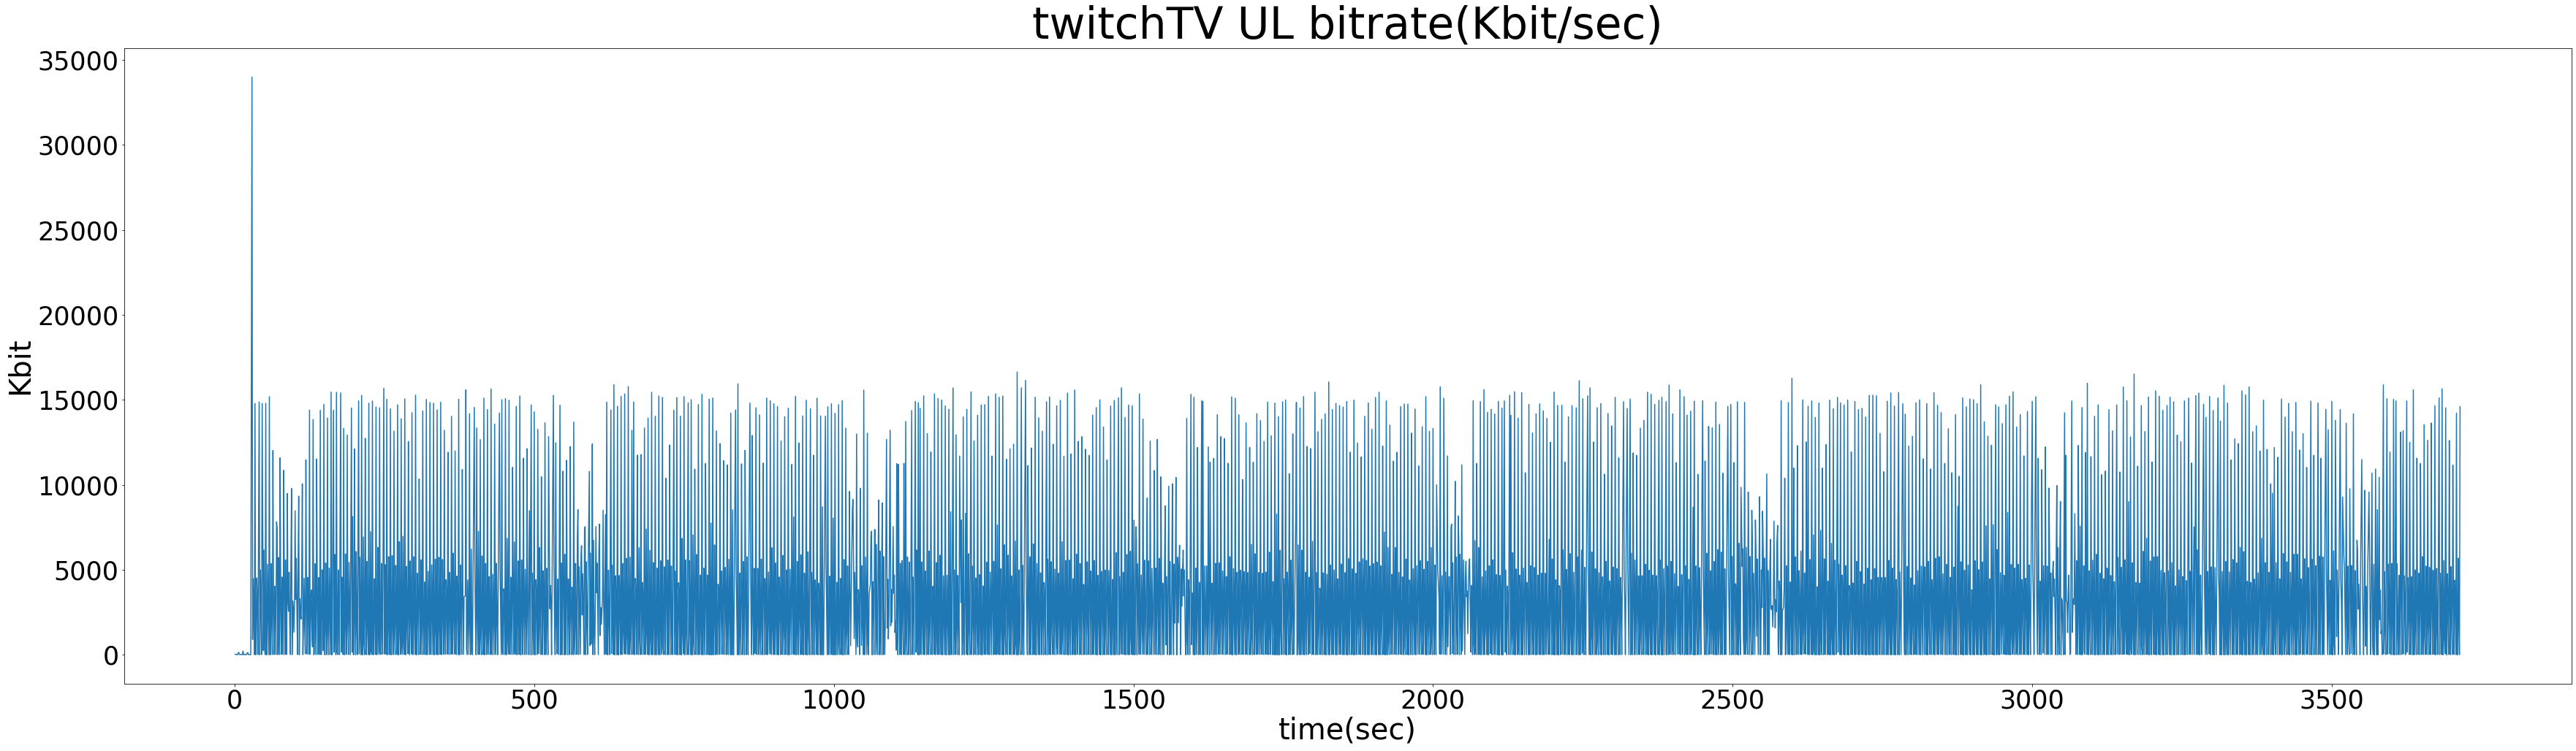

In [19]:
plt.figure(figsize=(60,16))
plt.title('twitchTV UL bitrate(Kbit/sec)', fontsize=60)
plt.xlabel('time(sec)', fontsize=40)
plt.ylabel('Kbit', fontsize=40)
plt.yticks(fontsize=35)
plt.xticks(fontsize=35)
plt.plot(ul_bitrate[:,0], ul_bitrate[:,1])
plt.show()

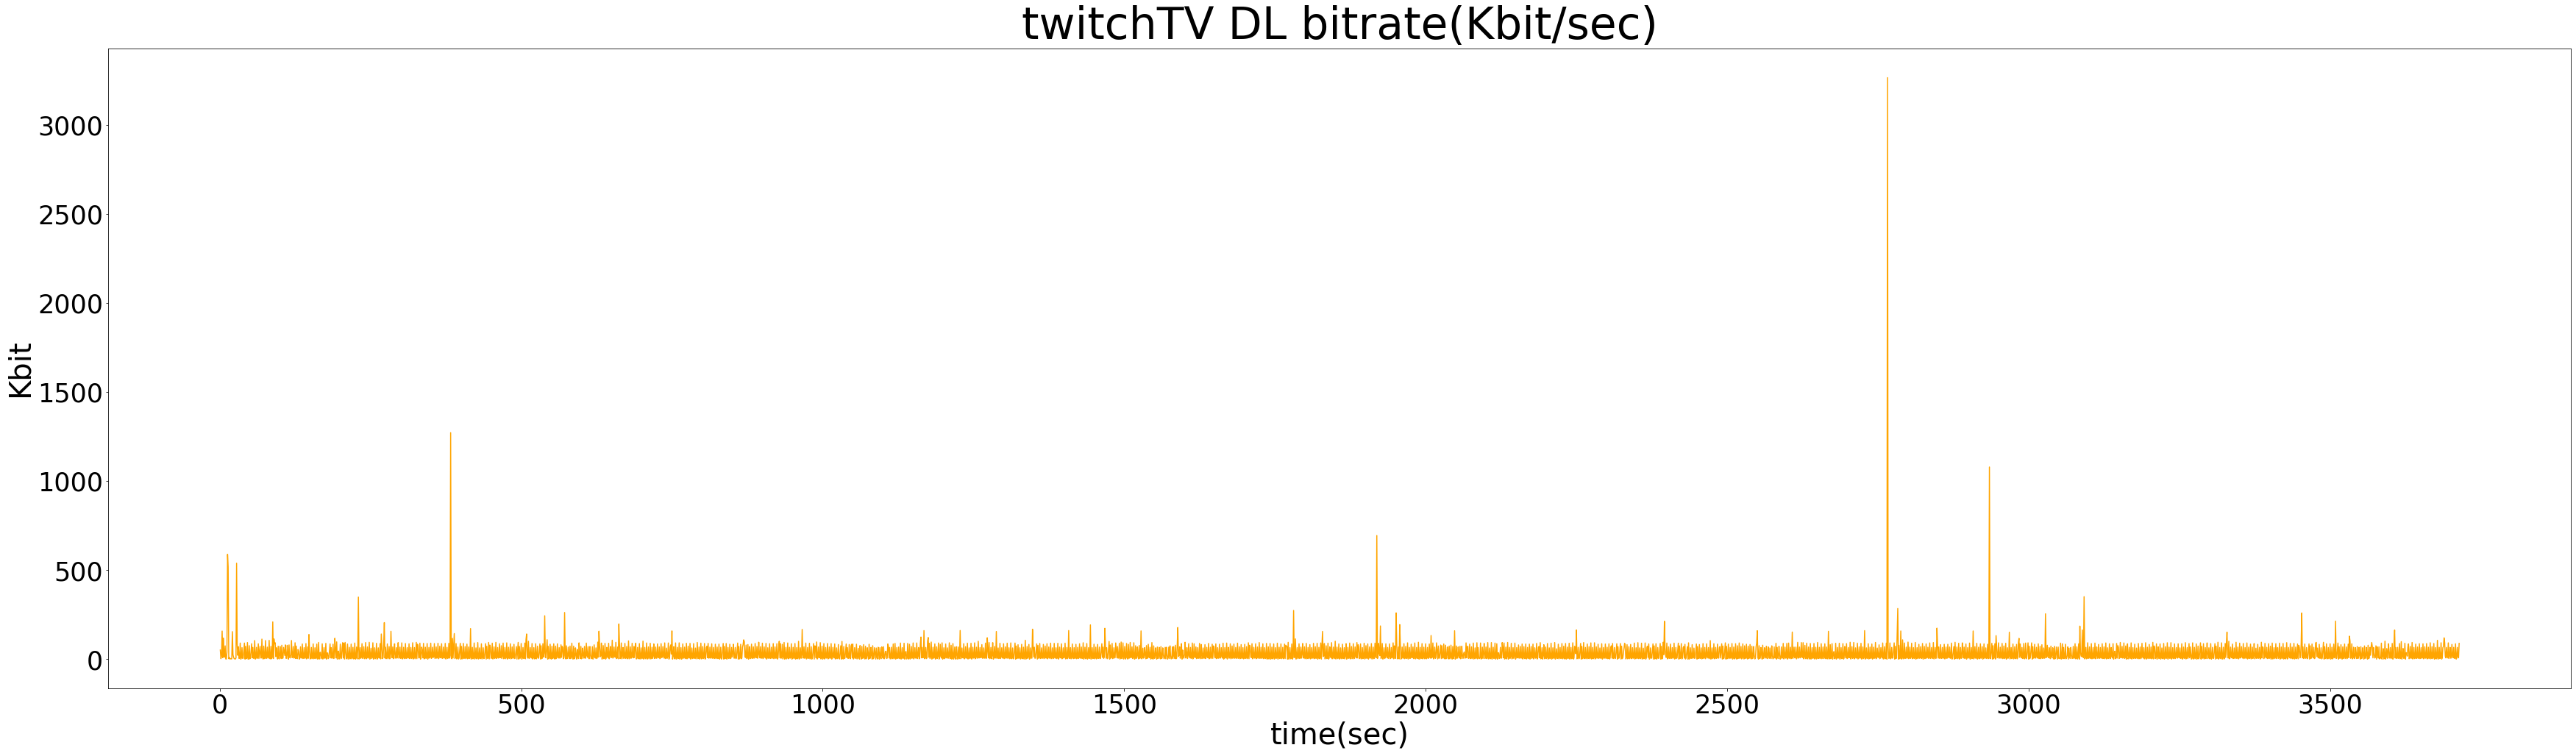

In [20]:
plt.figure(figsize=(60,16))
plt.title('twitchTV DL bitrate(Kbit/sec)', fontsize=60)
plt.xlabel('time(sec)', fontsize=40)
plt.ylabel('Kbit', fontsize=40)
plt.yticks(fontsize=35)
plt.xticks(fontsize=35)
plt.plot(dl_bitrate[:,0], dl_bitrate[:,1], color = 'orange')
plt.show()

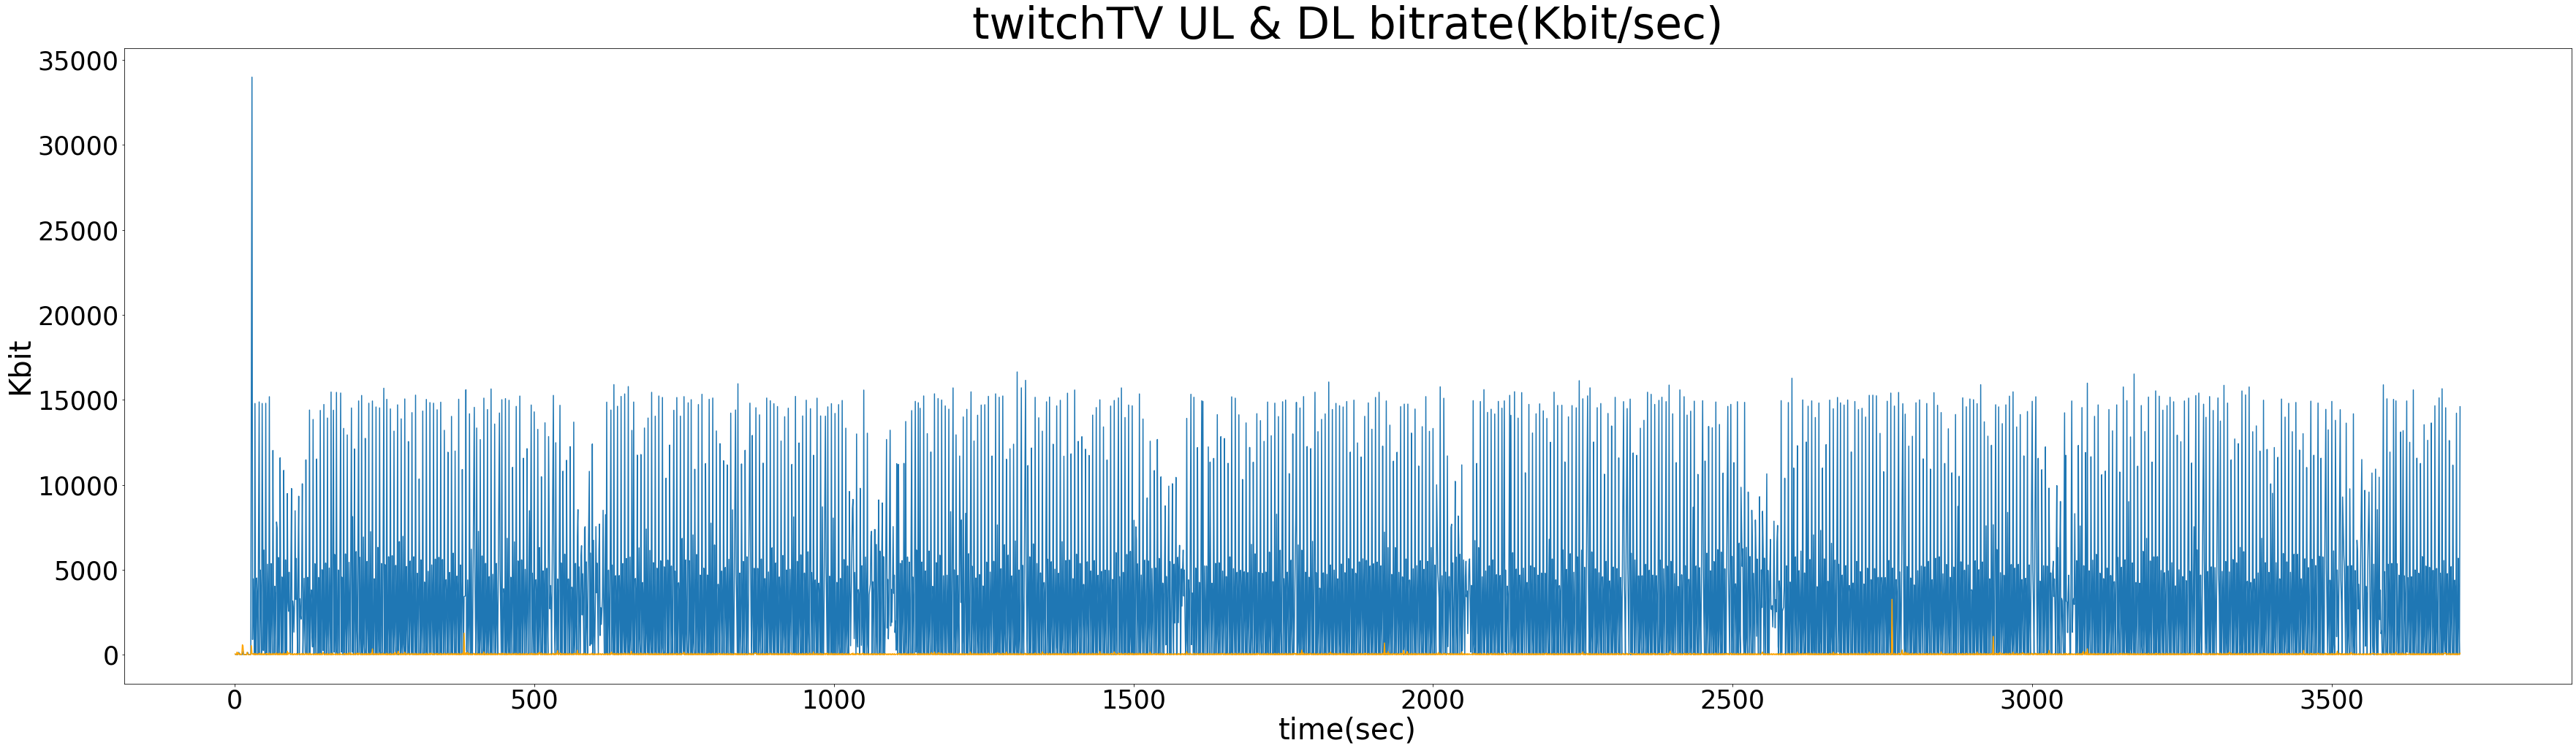

In [21]:
plt.figure(figsize=(60,16))
plt.title('twitchTV UL & DL bitrate(Kbit/sec)', fontsize=60)
plt.xlabel('time(sec)', fontsize=40)
plt.ylabel('Kbit', fontsize=40)
plt.yticks(fontsize=35)
plt.xticks(fontsize=35)
plt.plot(ul_bitrate[:,0], ul_bitrate[:,1])
plt.plot(dl_bitrate[:,0], dl_bitrate[:,1], color = 'orange')
plt.show()

In [22]:
df = pd.DataFrame(ul_bitrate)
df

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

seq= df[[1]].to_numpy()

In [23]:
def seq2dataset(seq,window, horizon):
    X=[]; Y=[]
    for i in range(len(seq)-(window+horizon)+1):
        x= seq[i:i+window]
        y= seq[i+window+horizon-1]
        X.append(x); Y.append(y)
    return np.array(X), np.array(Y)

w=7
h=1

X,Y= seq2dataset(seq,w,h)

In [24]:
split = int(len(X)*0.7)
x_train= X[0:split]; y_train = Y[0:split]
x_test= X[split:]; y_test = Y[split:]

In [25]:
model=Sequential()
model.add(LSTM(units=128, activation='relu', input_shape=x_train[0].shape))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
hist=model.fit(x_train,y_train, epochs=200, batch_size=1, validation_data=(x_test,y_test), verbose=1)

Epoch 1/200
2515/2515 [==============================] - 6s 2ms/step - loss: 2880.5315 - mae: 2880.5315 - val_loss: 2326.8176 - val_mae: 2326.8176
Epoch 2/200
2515/2515 [==============================] - 5s 2ms/step - loss: 2715.7312 - mae: 2715.7312 - val_loss: 2548.1750 - val_mae: 2548.1750
Epoch 3/200
2515/2515 [==============================] - 5s 2ms/step - loss: 2861.0400 - mae: 2861.0400 - val_loss: 2046.9923 - val_mae: 2046.9923
Epoch 4/200
2515/2515 [==============================] - 5s 2ms/step - loss: 2183.5564 - mae: 2183.5564 - val_loss: 1885.1559 - val_mae: 1885.1559
Epoch 5/200
2515/2515 [==============================] - 5s 2ms/step - loss: 2815.7852 - mae: 2815.7852 - val_loss: 2228.1135 - val_mae: 2228.1135
Epoch 6/200
2515/2515 [==============================] - 5s 2ms/step - loss: 2345.6475 - mae: 2345.6475 - val_loss: 2168.8586 - val_mae: 2168.8586
Epoch 7/200
2515/2515 [==============================] - 5s 2ms/step - loss: 2516.8984 - mae: 2516.8984 - val_loss: 21

손실 함수 1349.116455078125 MAE: 1349.116455078125
평균 절댓값 백분율 오차(MAPE) [27.78861682]


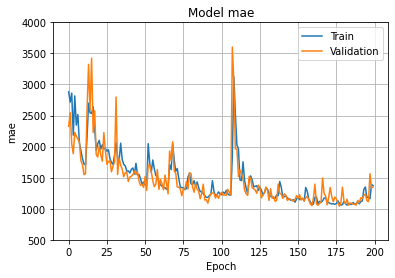

In [33]:
ev=model.evaluate(x_test,y_test, verbose=0)
print("손실 함수", ev[0], "MAE:",ev[1])

pred=model.predict(x_test)
print("평균 절댓값 백분율 오차(MAPE)", sum(abs(y_test-pred)/y_test)/len(x_test))

plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.ylim([500, 4000])
plt.legend(['Train', 'Validation'],loc='best')
plt.grid()
plt.show()

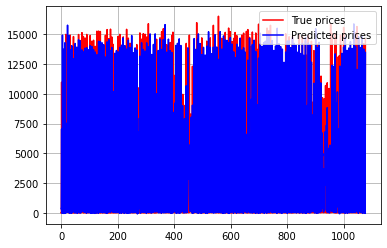

In [27]:
x_range = range(len(y_test))
plt.plot(x_range, y_test[x_range], color='red')
plt.plot(x_range, pred[x_range], color='blue')
plt.legend(['True prices', 'Predicted prices'], loc='best')
plt.grid()
plt.show()